# Exploratory Data Analysis of the Hotel Customer Dataset
**Evamaria Saunders** <br>
**24/11/2021** <br>
**Dataset**: https://www.kaggle.com/nantonio/a-hotels-customers-dataset?resource=download <br>
*More Information*: https://www.sciencedirect.com/science/article/pii/S2352340920314645?via%3Dihub <br>

<br>

## Part 1: Preparations

In [264]:
#import relevant libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
from math import sqrt

In [3]:
#activate plot style
plt.style.use("seaborn")

In [4]:
#open dataset
file_dir = "C:/Users/Computer/Documents/Evamaria's Documents/Personal Projects/Data/HotelCustomersDataset.xlsx"
dataset = pd.read_excel(file_dir)

In [ ]:
print(dataset.dtypes)
print(dataset.shape)
dataset.head()

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')
ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights     

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## Part 2: Data Exploration using Descriptive Statistics & Visualistions
The initial datasets consists of 31 columns and 83590 rows which contain customer information from a Hotel in Lisbon. Detailed information about each variable can be found on the link specified at the top. The most relevant variables can be grouped into several categories: 
1. Demographical: $Age$, $Nationality$
2. Main Booking Statistics: $LodgingRevenue$, $OtherRevenue$, $BookingsCanceled$, $BookingsNoShowed$, $BookingsCheckedIn$, $PersonsNights$, $RoomNights$
3. Booking Preferences: $SRHighFloor$, $SRLowFloor$, $SRAccessibleRoom$, $SRMediumFloor$, $SRBathtub$, $SRShower$, $SRCrib$, $SRKingSizeBed$, $SRTwinBed$, $SRNearElevator$, $SRAwayFromElevator$, $SRNoAlcoholInMiniBar$, $SRQuietRoom$
4. Time-Related Variables: $DaysSinceCreation$, $AverageLeadTime$, $DaysSinceLastStay$, $DaysSinceFirstStay$
5. Other: $DistributionChannel$, $MarketSegment$

In the following sections, these variables will be explored statistically and visually based on these categories. Notably, for now steps relevant for pre-processing such as checking for outliers, missing values, or altering variable types will be skipped. The intention is to first gain an understanding of the dataset while practicing my exploratory data analysis skills, before moving on to proper data pre-processing.

### Part 2.1: Demographics

Regarding **age**, a typical customer seems to be in the range of 40 to around 55 with a mean of roughly 45. The distribution looks aproximately normal with ages of 20 and below as well as 65 and above being much less common. 
In terms of **Nationality**, the hotel's top customers are from France, followed unexpectedly by Portugal itself, as well as several other European countries such as Germany, Spain, and Italy. 

In [ ]:
#basic descriptive statistics
print(dataset["Age"].describe())
print("\n")
print(dataset["Nationality"].describe())

count    79811.000000
mean        45.398028
std         16.572368
min        -11.000000
25%         34.000000
50%         46.000000
75%         57.000000
max        122.000000
Name: Age, dtype: float64


count     83590
unique      188
top         FRA
freq      12422
Name: Nationality, dtype: object


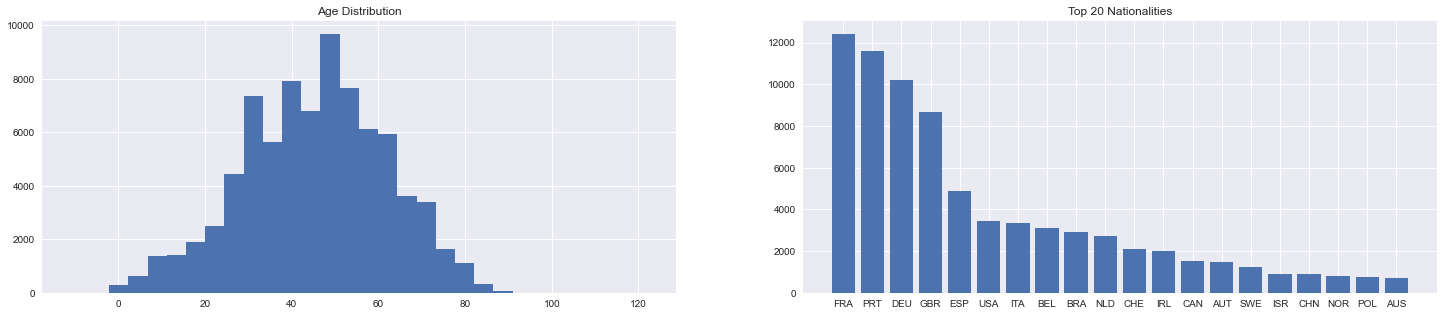

In [405]:
#plot age and nationality
figure, axis = plt.subplots(1,2, figsize = (25,5))

axis[0].hist(dataset["Age"], 30)
axis[0].set_title("Age Distribution")

axis[1].bar(dataset["Nationality"].value_counts().index[0:20], dataset["Nationality"].value_counts()[0:20])
axis[1].set_title("Top 20 Nationalities")

plt.show()

In [406]:
dataset["Nationality"].value_counts()[0:20]

FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
USA     3429
ITA     3365
BEL     3119
BRA     2902
NLD     2725
CHE     2108
IRL     1996
CAN     1524
AUT     1489
SWE     1231
ISR      900
CHN      891
NOR      795
POL      760
AUS      723
Name: Nationality, dtype: int64

### Part 2.2: Main Booking Statistics

In [9]:
#basic descriptive statistics
round(dataset[["LodgingRevenue", "OtherRevenue", "BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "RoomNights"]].describe(), 2)

,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
count,83590.00,83590.00,83590.00,83590.00,83590.00,83590.00,83590.00
mean,298.80,67.59,0.00,0.00,0.79,4.65,2.36
std,372.85,114.33,0.07,0.03,0.70,4.57,2.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,59.00,2.00,0.00,0.00,1.00,1.00,1.00
50%,234.00,38.50,0.00,0.00,1.00,4.00,2.00
75%,402.00,87.68,0.00,0.00,1.00,6.00,4.00
max,21781.00,7730.25,9.00,3.00,66.00,116.00,185.00


#### Part 2.2.2: Revenue
In terms of **Revenue**, it should first be noted that the total Revenue consist of contributions from almost 76% of customers. Additionally, in almost all cases (> 99%), these individual contributions consisted of both lodging and other forms of revenue. In terms of magnitude, the revenue obtained from lodging is on average substantially higher than when obtained from other sources. Generally, around 80 to 85% of income likely come from lodging as opposed to other. Moreover, both variables show very extreme outliers; hence, the top 5% were excluded in both cases for the sake of visualisation. Notably, the Lodging Revenue shows some resemblance of symmetry while the Other Revenue decreases exponentially from the left. 

In [4]:
#absolute crosstab of whether or not the hotel reported any revenue for a customer
pd.crosstab(dataset["LodgingRevenue"] > 0, dataset["OtherRevenue"] > 0, margins = True)

OtherRevenue,False,True,All
LodgingRevenue,,,
False,20205,203,20408
True,9,63173,63182
All,20214,63376,83590


In [23]:
#relative crosstab of whether or not the hotel reported any revenue for a customer
round(pd.crosstab(dataset["LodgingRevenue"] > 0, dataset["OtherRevenue"] > 0, margins = True, normalize = "all"),4)*100

OtherRevenue,False,True,All
LodgingRevenue,,,
False,24.17,0.24,24.41
True,0.01,75.57,75.59
All,24.18,75.82,100.00


In [6]:
#percentage per customer of revenue obtained through lodging versus other
revenue = dataset[["LodgingRevenue", "OtherRevenue"]]
revenue["Total"] = revenue["LodgingRevenue"] + revenue["OtherRevenue"]
revenue["Lodging_Prop"] = round(revenue["LodgingRevenue"] / revenue["Total"], 4)
revenue["Other_Prop"] = round(revenue["OtherRevenue"] / revenue["Total"], 4)

C:\Users\Computer\AppData\Local\Temp/ipykernel_3192/3734733199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue["Total"] = revenue["LodgingRevenue"] + revenue["OtherRevenue"]
C:\Users\Computer\AppData\Local\Temp/ipykernel_3192/3734733199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue["Lodging_Prop"] = round(revenue["LodgingRevenue"] / revenue["Total"], 4)
C:\Users\Computer\AppData\Local\Temp/ipykernel_3192/3734733199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [32]:
revenue.iloc[:,2:].describe()

,Total,Lodging_Prop,Other_Prop
count,83590.000000,63385.000000,63385.000000
mean,366.391219,0.819120,0.180880
std,443.800439,0.131458,0.131458
min,0.000000,0.000000,0.000000
25%,73.000000,0.766400,0.095800
50%,286.425000,0.853600,0.146400
75%,497.300000,0.904200,0.233600
max,23365.000000,1.000000,1.000000


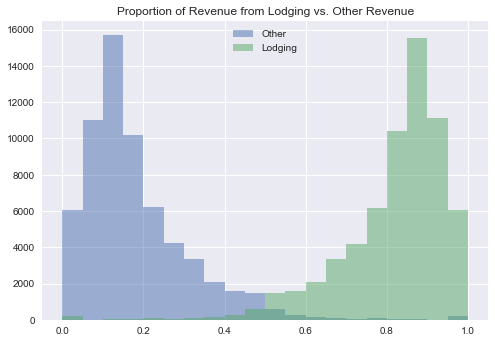

In [30]:
plt.hist(revenue["Other_Prop"], 20, alpha = 0.5, label = "Other")
plt.hist(revenue["Lodging_Prop"], 20, alpha = 0.5, label = "Lodging")
plt.title("Proportion of Revenue from Lodging vs. Other Revenue")
plt.legend()
plt.show()

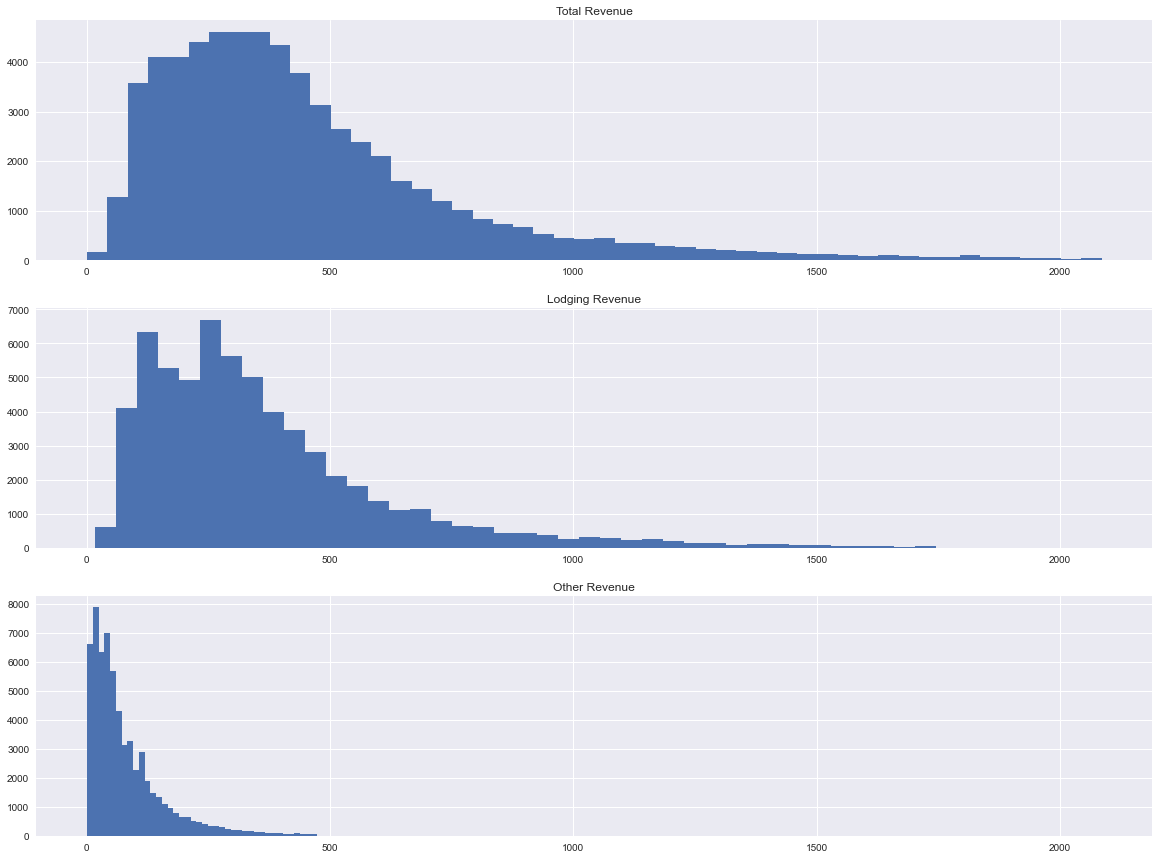

In [37]:
#plot revenue
figure, axis = plt.subplots(3,1, figsize = (20,15))

#exclude: customers where no revenue was obtained & everything above the 99th percentile
filtered_rev = revenue["Total"][(revenue["Total"] < revenue["Total"].quantile(0.99)) & (revenue["Total"] > 0)]
filtered_lrev = revenue["LodgingRevenue"][(revenue["LodgingRevenue"] < revenue["LodgingRevenue"].quantile(0.99)) & (revenue["LodgingRevenue"] > 0)]
filtered_orev = revenue["OtherRevenue"][(revenue["OtherRevenue"] < revenue["OtherRevenue"].quantile(0.99)) & (revenue["OtherRevenue"] > 0)]

axis[0].hist(filtered_rev, 50)
axis[0].set_title("Total Revenue")

axis[1].hist(filtered_lrev, 40)
axis[1].set_title("Lodging Revenue")

plt.setp(axis, xlim=axis[0].get_xlim())

axis[2].hist(filtered_orev,40)
axis[2].set_title("Other Revenue")

plt.show()

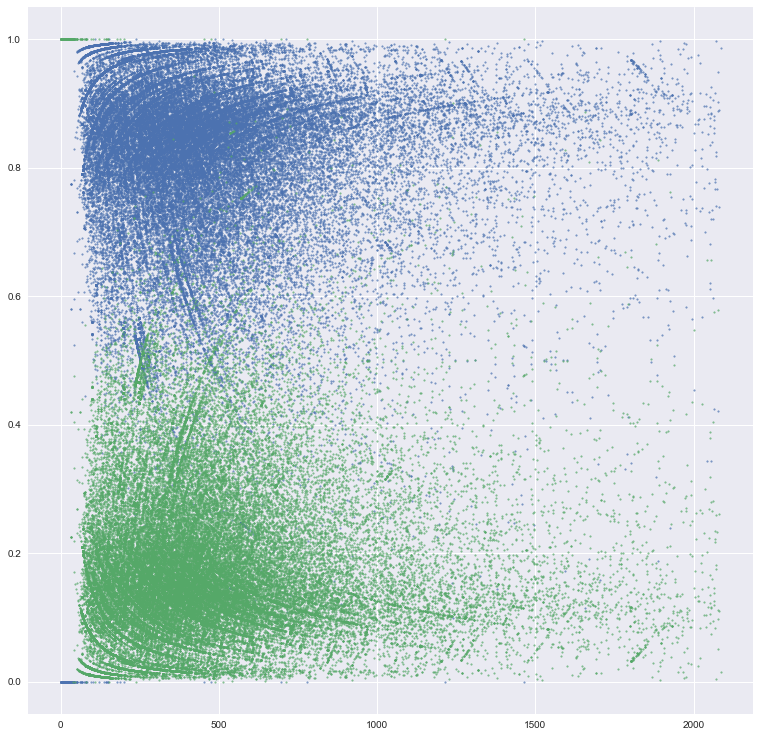

In [54]:
#considering whether there might be a relationship between the total revenue & the proportion of revenue from other vs lodging
#the general picture that emerges is that there are some basic patterns: increase in prop of revenue from lodging first means a high increase in total revenue, which the slows down, a decrease in the prop of revenue from lodging also can simply mean a sharp decrease in total revenue
#in line with this, the matching pattern emerges for other revenue
plt.figure(figsize=(13,13))
plt.scatter(filtered_rev, revenue["Lodging_Prop"][(revenue["Total"] < revenue["Total"].quantile(0.99)) & (revenue["Total"] > 0)], alpha = 0.7, s = 3)
plt.scatter(filtered_rev, revenue["Other_Prop"][(revenue["Total"] < revenue["Total"].quantile(0.99)) & (revenue["Total"] > 0)], alpha = 0.7, s = 3)

#### Part 2.2.2: Booking Outcomes
In terms of **Booking Outcomes**, around 76% of Customers have checked in at least once, although less than 2% checked in more than once. In other words, this hotel attracts very few repeat customers. On a positive note, the proportions of cancellations or no shows are both very low. Two notable customers are one person that cancelled a total of 9 times, as well as one person that did not show three times. 
<br>
In terms of the total nights customers have checked in for: 

In [3]:
#frequency table for Booking Outcomes
freq = pd.DataFrame(range(dataset["BookingsCheckedIn"].max()))
freq.columns = ["index"]
checked_in = dataset["BookingsCheckedIn"].value_counts().sort_index().to_frame().reset_index()
canceled  = dataset["BookingsCanceled"].value_counts().sort_index().to_frame().reset_index()
noshowed = dataset["BookingsNoShowed"].value_counts().sort_index().to_frame().reset_index()

merged_df1 = freq.merge(checked_in, how = "left")
merged_df2 = merged_df1.merge(canceled, how = "left")
merged_final = merged_df2.merge(noshowed, how = "left")
merged_final.fillna(0, inplace = True)

merged_final[0:11]

,index,BookingsCheckedIn,BookingsCanceled,BookingsNoShowed
0,0,19920.0,83472.0,83546.0
1,1,62215.0,92.0,36.0
2,2,1147.0,12.0,7.0
3,3,132.0,8.0,1.0
4,4,59.0,5.0,0.0
5,5,20.0,0.0,0.0
6,6,20.0,0.0,0.0
7,7,16.0,0.0,0.0
8,8,10.0,0.0,0.0
9,9,9.0,1.0,0.0


In [61]:
#percentage of customers with 0 versus 1+ check-ins
print((dataset["BookingsCheckedIn"] == 0).value_counts()/len(dataset["BookingsCheckedIn"]))

#percentage of customers with more than 1 checkin
print("\n", round(len(dataset["BookingsCheckedIn"][dataset["BookingsCheckedIn"] > 1])/len(dataset["BookingsCheckedIn"]),4))

False    0.761694
True     0.238306
Name: BookingsCheckedIn, dtype: float64

 0.0174


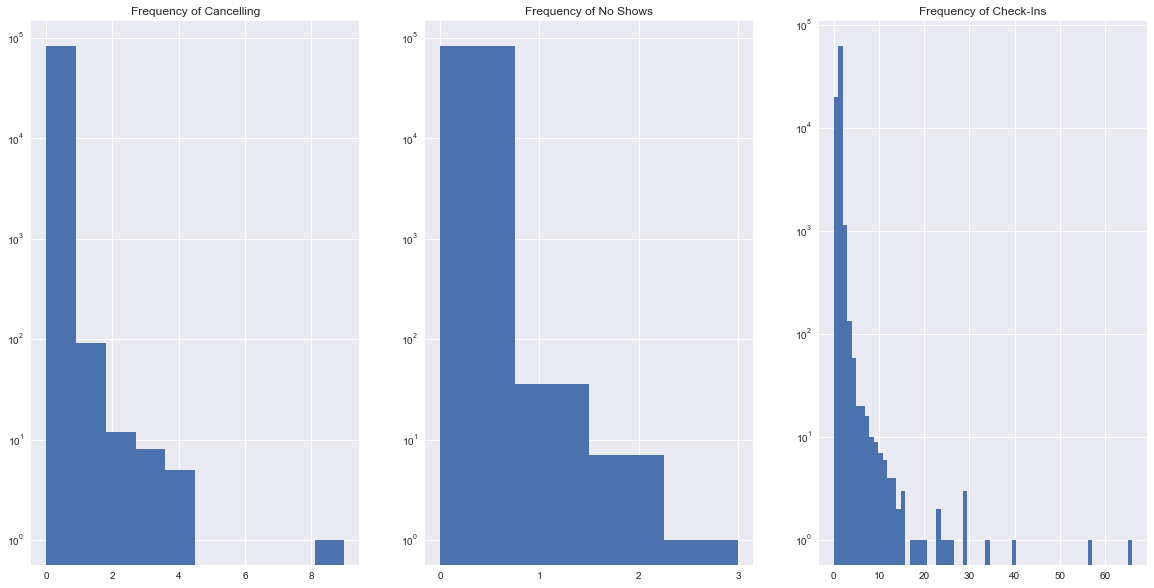

In [5]:
#plot bookings cancelled, no shows, and checkins
#plots use log scale as the majority of values are equal to 0
plt.style.use("seaborn")
figure, axis = plt.subplots(1,3, figsize = (20,10))

axis[0].hist(dataset["BookingsCanceled"],10)
axis[0].set_yscale("log")
axis[0].set_title("Frequency of Cancelling")

axis[1].hist(dataset["BookingsNoShowed"],4)
axis[1].set_yscale("log")
axis[1].set_xticks(ticks = [0,1,2,3])
axis[1].set_title("Frequency of No Shows")

axis[2].hist(dataset["BookingsCheckedIn"], 67)
axis[2].set_yscale("log")
axis[2].set_title("Frequency of Check-Ins")

plt.show()

#### Part 2.2.3: Room\*Nights & Persons\*Nights
Concerning the "total number of nights * total number of rooms" as well as the "total number of nights * total number of people" per customers, several observations can be made. Firstly, both variables show rather extreme outliers, and even without these outliers the general distributions show a skew to the right. In other words, staying fewer nights, booking fewer rooms, or coming with fewer people is more common. This is in line with the observation that the majority of customers are one-time customers. 
In terms of the relationship between these two variables, the plot shows several linear trends. When examining this more closely for the one-time customers (where the pattern  is not clouded by multiple non-homogenous trips), we can draw certain conclusions about the minimum number of guests per booking. Specifically, for one time bookings bookings with at least 2 people are most common. 

In [19]:
#only select customers that have spent more than 0 nights
nights = dataset[["RoomNights", "PersonsNights"]][dataset["RoomNights"] > 0]
print(nights.describe())

#there are two cases where PersonsNights is equal to 0 despite the customer having spent more than 0 nights; could these cases represent outliers? 
nights[nights["PersonsNights"] == 0]

         RoomNights  PersonsNights
count  63670.000000   63670.000000
mean       3.096435       6.103675
std        2.133161       4.302674
min        1.000000       0.000000
25%        2.000000       3.000000
50%        3.000000       6.000000
75%        4.000000       8.000000
max      185.000000     116.000000


,RoomNights,PersonsNights
43667,4,0
80019,2,0


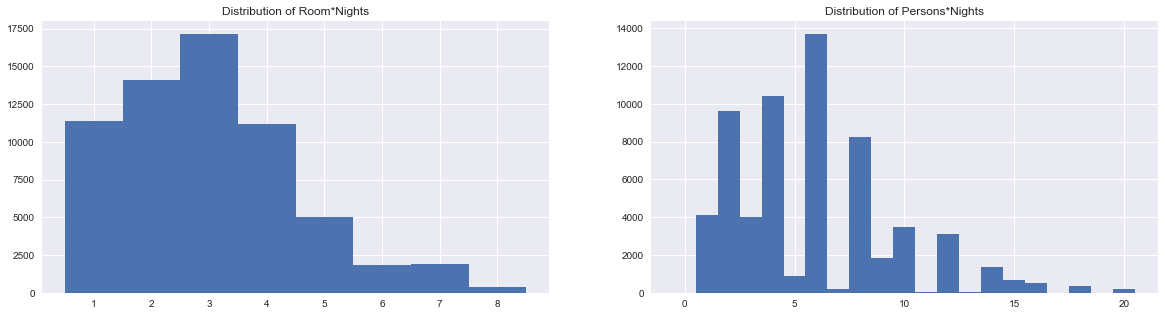

In [80]:
#plotting the distributions of RoomNights and PersonsNights
figure, axis = plt.subplots(1,2, figsize = (20,5))

#excluding thetop 1% values as they are substantially larger 
rnights99 = nights["RoomNights"][nights["RoomNights"] < nights["RoomNights"].quantile(0.99)]
pnights99 = nights["PersonsNights"][nights["PersonsNights"] < nights["PersonsNights"].quantile(0.99)]

axis[0].bar(sorted(rnights99.unique()), rnights99.value_counts().sort_index(), width = 1)
axis[0].set_title("Distribution of Room*Nights")

axis[1].bar(sorted(pnights99.unique()), pnights99.value_counts().sort_index(), width = 1)
axis[1].set_title("Distribution of Persons*Nights")

plt.show()

(0.0, 100.0)

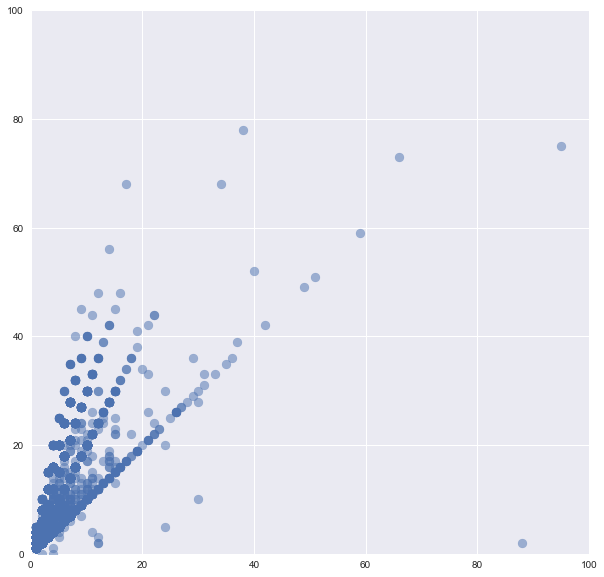

In [78]:
#plotting the relationship between RoomNights & PersonsNights 
plt.figure(figsize = (10,10))
plt.scatter(nights["RoomNights"], nights["PersonsNights"], s = 80, alpha = 0.5)
plt.xlim(0,100)
plt.ylim(0,100)

In [94]:
#for one time customers, compute the minimum number of persons that stayed at the hotel under this booking
one_time_cust = dataset[["BookingsCheckedIn", "RoomNights", "PersonsNights"]][dataset["BookingsCheckedIn"] == 1]
one_time_cust["Min_Persons"] = one_time_cust["PersonsNights"]/one_time_cust["RoomNights"]
print(one_time_cust["Min_Persons"].value_counts().sort_index())

0.0        2
1.0    13466
2.0    40091
3.0     6996
4.0     1553
5.0      107
Name: Min_Persons, dtype: int64


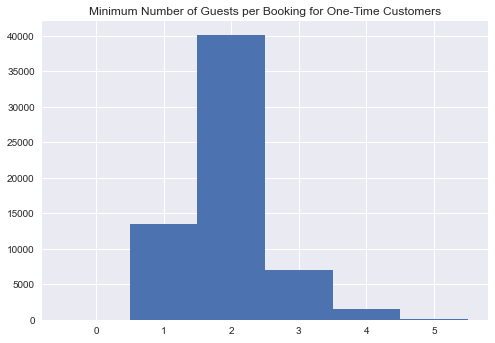

In [95]:
plt.bar(one_time_cust["Min_Persons"].unique(), one_time_cust["Min_Persons"].value_counts(), width = 1)
plt.title("Minimum Number of Guests per Booking for One-Time Customers")
plt.show()

### Part 2.3: Booking Preferences
Concerning **booking preferences**, around half of guests never usually voice any preferences, while the other half usually voices at least one preference. Notably, it is less common that customers usually voice more than one preference, and no customer has voiced more than four preferences.
In terms of specific preferences, the majority of possible booking preferences were voiced very rarely. Specifically, of the 13 options, 8 were asked for less than 1% of the time. The most frequently requested preferences are for: a  King-sized Bed (35%), a Twin Bed (14%), a Quiet Room (9%), and a High Floor (5%). This hierarchy does not change when contrasting customers with different numbers of preferences voiced. In other words, regardless of the number of preferences usually voice, the four top ones are chosen most frequently. There are two limitations to this generalisation. Firstly, as the King-sized bed is the highest preference, the twin-sized bed is requested substantially less frequently by customers that voice 2 or more preferences. Secondly and in line with this, customers who usually voice four preferences, tend to ask for a room close to the elevator as opposed to a room with a twin bed. 

In [114]:
#display absolute frequencies of outcomes
dataset[["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib", "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"]].apply(lambda x: x.value_counts())

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,79621,83472,83569,83517,83352,83447,82485,54109,71675,83562,83297,83580,76203
1,3969,118,21,73,238,143,1105,29481,11915,28,293,10,7387


In [113]:
#display relative frequencies (as percentage points)
round(dataset[["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib", "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"]].apply(lambda x: x.value_counts(normalize = True)) * 100, 2)

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,95.25,99.86,99.97,99.91,99.72,99.83,98.68,64.73,85.75,99.97,99.65,99.99,91.16
1,4.75,0.14,0.03,0.09,0.28,0.17,1.32,35.27,14.25,0.03,0.35,0.01,8.84


In [86]:
#compute the total number of preferences usualyl voiced by customers 
preferences = dataset[["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib", "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"]]

preferences["total_pref"] = preferences.sum(axis = 1)

C:\Users\Computer\AppData\Local\Temp/ipykernel_3192/1614683977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preferences["total_pref"] = preferences.sum(axis = 1)


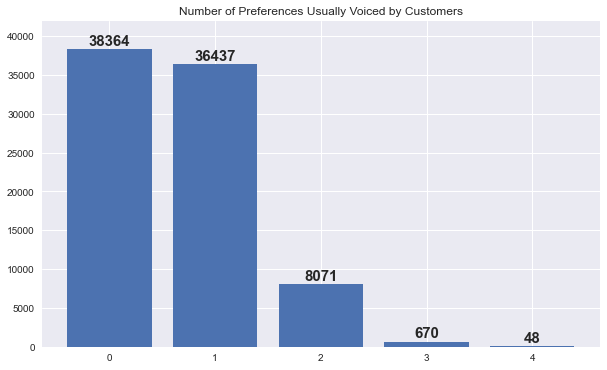

In [229]:
plt.figure(figsize= (10,6))
plt.bar(preferences["total_pref"].unique(), preferences["total_pref"].value_counts().sort_index())
plt.title("Number of Preferences Usually Voiced by Customers")
plt.ylim(0,42000)

for i in range(5):
   plt.text(i, preferences["total_pref"].value_counts().sort_index()[i] + 500, preferences["total_pref"].value_counts().sort_index()[i], ha = 'center', fontdict={"size":15, "weight":"bold"})

plt.show()

Text(0.5, 1.0, 'Frequency of different Preferences')

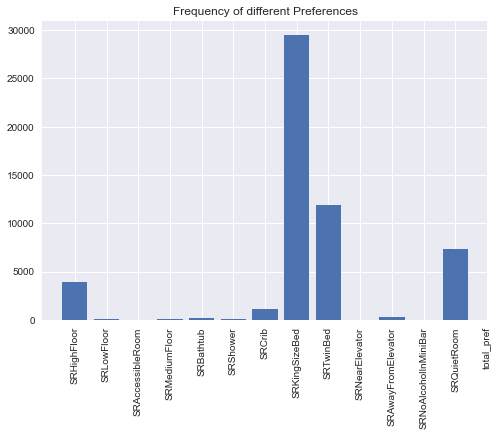

In [234]:
plt.bar(preferences.sum(axis = 0).index[:13], preferences.sum(axis = 0)[:13])
plt.xticks(preferences.columns, rotation = 90)
plt.title("Frequency of different Preferences")

C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0,0].set_xticklabels(preferences.columns, rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0,1].set_xticklabels(preferences.columns, rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,0].set_xticklabels(preferences.columns, rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,1].set_xticklabels(preferences.columns, rotation = 90)


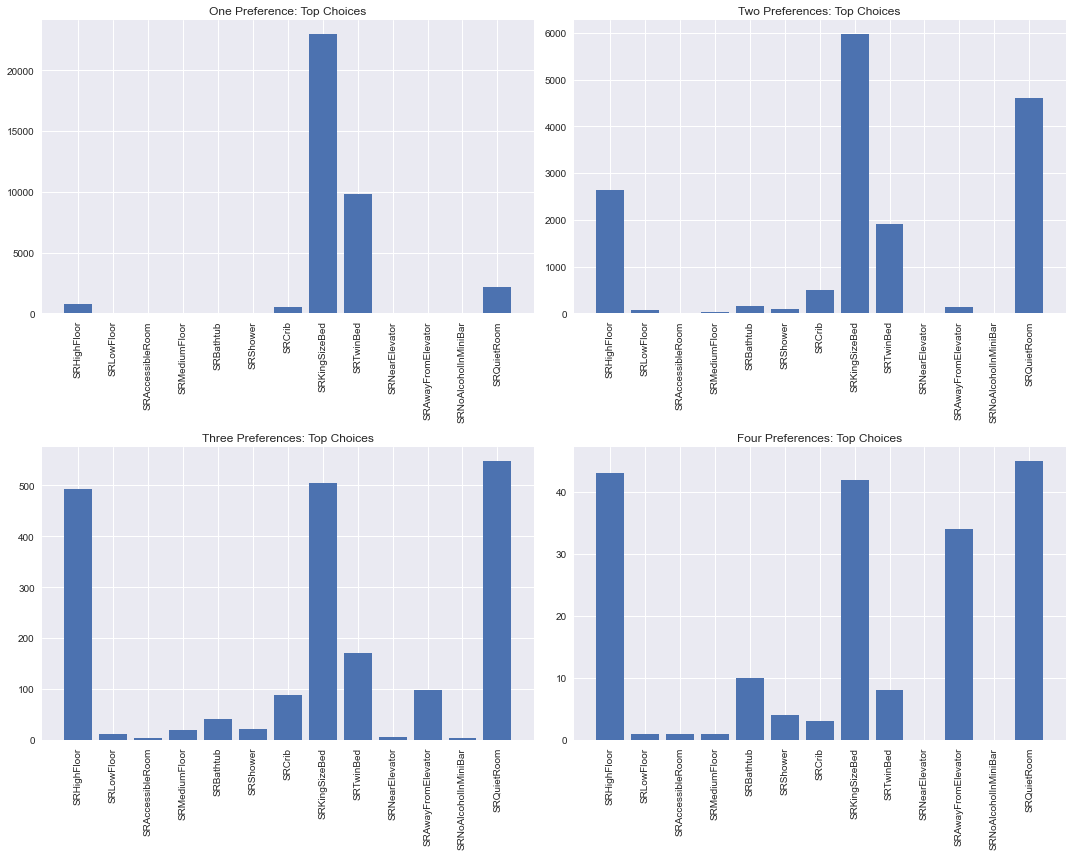

In [235]:
#depending on the number of preferences usually voiced, plot which preferences were voiced most commonly
figure, axis = plt.subplots(2,2, figsize = (15,12))

axis[0,0].bar(preferences[preferences["total_pref"] == 1].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 1].sum(axis = 0)[:13])
axis[0,0].set_xticklabels(preferences.columns, rotation = 90)
axis[0,0].set_title("One Preference: Top Choices")

axis[0,1].bar(preferences[preferences["total_pref"] == 2].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 2].sum(axis = 0)[:13])
axis[0,1].set_xticklabels(preferences.columns, rotation = 90)
axis[0,1].set_title("Two Preferences: Top Choices")

axis[1,0].bar(preferences[preferences["total_pref"] == 3].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 3].sum(axis = 0)[:13])
axis[1,0].set_xticklabels(preferences.columns, rotation = 90)
axis[1,0].set_title("Three Preferences: Top Choices")

axis[1,1].bar(preferences[preferences["total_pref"] == 4].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 4].sum(axis = 0)[:13])
axis[1,1].set_xticklabels(preferences.columns, rotation = 90)
axis[1,1].set_title("Four Preferences: Top Choices")

plt.tight_layout()
#plt.show(0)

### Part 2.4: Time-Related Variables

In [368]:
round(dataset[["AverageLeadTime", "DaysSinceCreation", "DaysSinceLastStay", "DaysSinceFirstStay"]].describe(), 2)

,AverageLeadTime,DaysSinceCreation,DaysSinceLastStay,DaysSinceFirstStay
count,83590.00,83590.00,83590.00,83590.00
mean,66.20,453.64,401.07,403.35
std,87.76,313.39,347.20,347.97
min,-1.00,0.00,-1.00,-1.00
25%,0.00,177.00,26.00,27.00
50%,29.00,397.00,366.00,369.00
75%,103.00,723.00,693.00,697.00
max,588.00,1095.00,1104.00,1186.00


#### Part 2.4.1 Average Lead Time
In terms of the **Average Lead Time**, it is notable that while an average lead time of zero frequently indicates a customer never made a booking, there is a small group of customers that must have make a booking on the same date as their arrival date. Aside from this, lead time shows an exponential decrease meaning shorter average lead times are increasingly more common. 

In [281]:
#there are 60867 cases where someone booked a hotel at least one day before their arrival date
print((dataset["AverageLeadTime"] > 0 ).value_counts())
print("\n")

#there are 2794 cases where someone booked a hotel on the same day as their arrival date
print( ( (dataset["AverageLeadTime"] == 0) & ((dataset["BookingsCanceled"] > 0) | (dataset["BookingsNoShowed"] > 0) | (dataset["BookingsCheckedIn"] > 0))).value_counts() )
print("\n")

#consequently, there are 19919 customers in the system that never completed a booking
print( ( (dataset["AverageLeadTime"] == 0) & ((dataset["BookingsCanceled"] == 0) & (dataset["BookingsNoShowed"] == 0) & (dataset["BookingsCheckedIn"] == 0))).value_counts() )

True     60867
False    22723
Name: AverageLeadTime, dtype: int64


False    80796
True      2794
dtype: int64


False    63671
True     19919
dtype: int64


83590

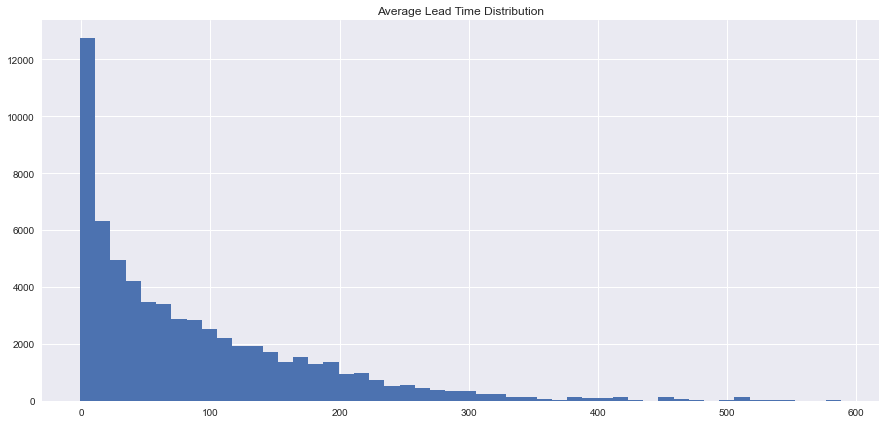

In [285]:
#plot average lead time for cases that completed one or more bookings
plt.figure(figsize=(15,7))
plt.hist(dataset["AverageLeadTime"][(dataset["BookingsCanceled"] > 0) | (dataset["BookingsNoShowed"] > 0) | (dataset["BookingsCheckedIn"] > 0)], 50)
plt.title("Average Lead Time Distribution")
plt.show()

#### Part 2.4.2 Days Since
In general, substantially more customers were created in the last 350 days compared to the periods before after a dip around 400 days ago. Another notable dip occured between 700 and 800 days ago where less customers were registered. This recent increase in customer creations coincides with an increase in the since more customers stayed for the first time. Notably, there has also been a separate increase in the days since last stay implying that repeat customers might have been increasing as of lately. On another note, the difference between the first and last stay (for customers that completed more than one boooking) tends to be rather small and becomes exponentially less common with an increase in days. 

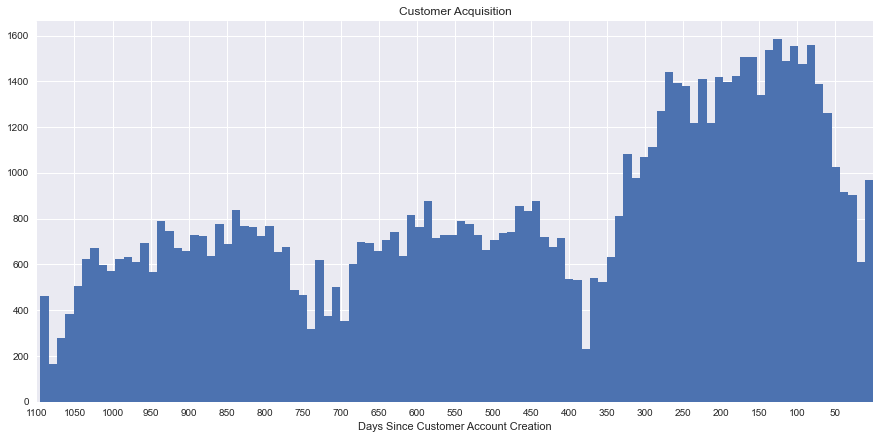

In [115]:
plt.figure(figsize = (15,7))
plt.hist(dataset["DaysSinceCreation"],100)
plt.xlim(max(dataset["DaysSinceCreation"]), min(dataset["DaysSinceCreation"]))
plt.xticks(ticks = list(range(1100,0,-50)))
plt.title("Customer Acquisition")
plt.xlabel("Days Since Customer Account Creation")
plt.show()

In [321]:
#compute the difference in days between last and first stay
days = dataset[["DaysSinceLastStay", "DaysSinceFirstStay"]][dataset["BookingsCheckedIn"] > 1]
days["Difference"] = days["DaysSinceFirstStay"] - days["DaysSinceLastStay"]

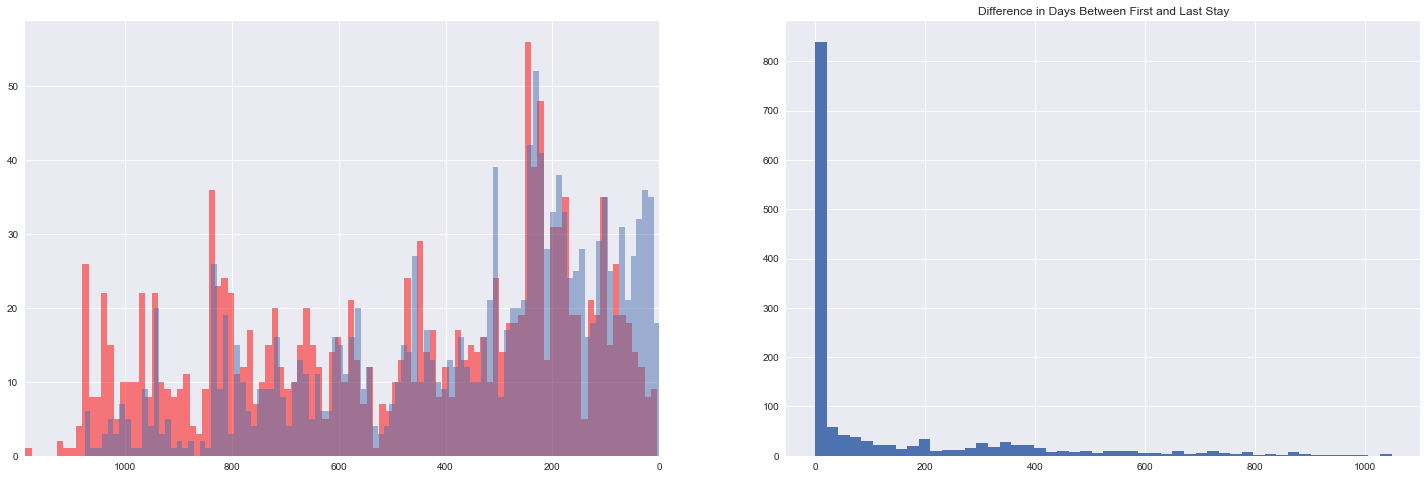

In [367]:
#plot the difference in days between first and last stay
figure, axis = plt.subplots(1,2, figsize = (25,8))

axis[0].hist(days["DaysSinceFirstStay"],100, alpha = 0.5, color = "red")
axis[0].hist(days["DaysSinceLastStay"],100, alpha = 0.5)
axis[0].set_xlim(max(days["DaysSinceFirstStay"]), 0)

axis[1].hist(days["Difference"],50)
axis[1].set_title("Difference in Days Between First and Last Stay")

plt.show()

### Part 2.5: Other Variables
In terms of the **Distribution Channel, customers typically rely on Travel Agents followed by Direct Channels. 
For the customer **Market Segments**, the majority falls into the other category, followed by Direct, Travel Agent, and Group. The other categories are represented only to a much lesser degree. 
Notably, while several of these categories exist across both variables, they do not correpsond 1 to 1. This is especially notable for the Corporate Distribution Channel where customers are distributed across all other market segments outside of the Corporate one as well. The closest overlaps seem to occur between Direct & Direct. 

In [373]:
dataset[["MarketSegment", "DistributionChannel"]].apply(lambda x: x.value_counts())

,MarketSegment,DistributionChannel
Aviation,244.0,NaN
Complementary,510.0,NaN
Corporate,2169.0,2600.0
Direct,11457.0,11912.0
Electronic Distribution,NaN,509.0
Groups,9501.0,NaN
Other,48039.0,NaN
Travel Agent/Operator,11670.0,68569.0


In [411]:
pd.crosstab(dataset["MarketSegment"], dataset["DistributionChannel"])

DistributionChannel,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
MarketSegment,,,,
Aviation,239,0,0,5
Complementary,14,393,0,103
Corporate,1724,46,2,397
Direct,14,11219,5,219
Groups,478,134,1,8888
Other,34,96,496,47413
Travel Agent/Operator,97,24,5,11544


C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/2642116058.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(sorted(dataset["MarketSegment"].unique()), rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/2642116058.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(sorted(dataset["DistributionChannel"].unique()), rotation = 90)


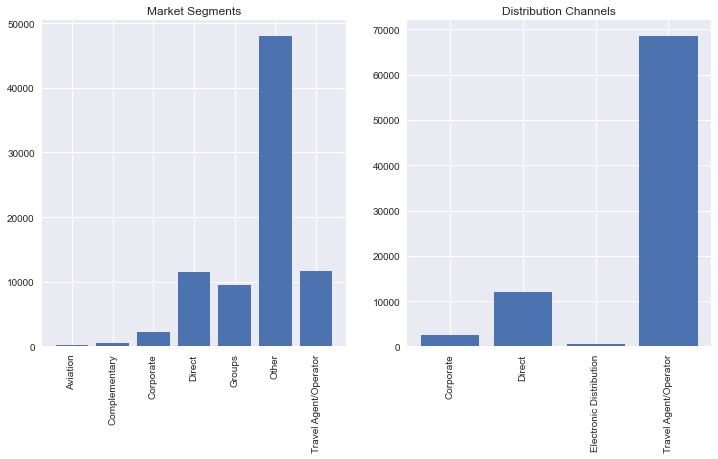

In [401]:
figure, axis = plt.subplots(1,2, figsize = (12,6))

axis[0].bar(sorted(dataset["MarketSegment"].unique()), dataset["MarketSegment"].value_counts().sort_index())
axis[0].set_xticklabels(sorted(dataset["MarketSegment"].unique()), rotation = 90)
axis[0].set_title("Market Segments")

axis[1].bar(sorted(dataset["DistributionChannel"].unique()), dataset["DistributionChannel"].value_counts().sort_index())
axis[1].set_xticklabels(sorted(dataset["DistributionChannel"].unique()), rotation = 90)
axis[1].set_title("Distribution Channels")

plt.show()

### Part 2.6: Summary of Descriptive Statistics
Across these main categories of variables, several main insights about the customers from this hotel can be derived. 
Firstly, the typical customer is in their 40s and from France, Portugal, Germany, or the UK. The likely relied on a travel agent to make their booking and fall into the "Other" market segment. Moreover, there is about a 50:50 chance that they voice a prefernce which is most likely going to be a request for a king-sized bed. Lastly, there is some reason to believe that the typical customer likely does not travel alone but with a partner. Importantly, customers are almost exclusively one-time customers. 
Secondly, in terms of bookings shorter stays with fewer people, fewer rooms, and a shorter average lead time are exponentially more common. Additionally, there are very few cancellations or now shows. 
Thirdly, total revenue mostly consist of lodging revenue and an increase in lodging revenue is much more likely than an increase in other revenue. Importantly, both types of revenue are obtained from almost every customer (with a booking). 

Two interesting observations: For several quantiative variables, there are quite extreme (high) outliers. Moreover, substantially more customers were registered in the last 300 days than in the periods beforehand. 


## Part 3: Data Exploration using Univariate Testing
After exploring the dataset using descriptive statistics and visualistions, the next step is to move on to basic inferential statistics to further explore and understand the hotel customer base. 
Based on the initial observations, the following steps are planned. <br>
(1) For (a) the proportion of revenue obtained from lodging, (b) the average revenue per customer, (c) the proportion of customers that completed at least 1 booking, (d) and the proportion of customers with one or more perference, compute the 95% confidence interval for the point estimate. <br>
(2) Contrast customers created within the last X days with customers created beforehand: Is there a difference in the proportion that created a booking, in the total revenue, or in the average age? 
(3) For the sake of practicing the Chi-Square test, is there an association between nationality and distribution channel for the top X nationalities? 

### Part 3.1 Confidence Intervals
Given the large sample size, the 95% CI will be very small, but the task is good practice nonetheless.

In [ ]:
data = [87,80,68,72,56,58,60,63,82,70,58,55,48,50,77]
#Calculate the sample parameters
confidenceLevel = 0.98             #98% CI given
degrees_freedom = len(data)-1      #degree of freedom = sample size-1
sampleMean = np.mean(data)          #sample mean
sampleStandardError = st.sem(data)   #sample standard error
#create 98% confidence interval for the population mean
confidenceInterval = st.t.interval(alpha=confidenceLevel, df=degrees_freedom, loc=sampleMean, scale=sampleStandardError)
#print the 98% confidence interval for the population mean
print('The 98% confidence interval for the population mean weight :',confidenceInterval)

In [41]:
#confidence interval for the average proportion of revenue obtained from lodging
LB, UB = st.t.interval(alpha = 0.05, df = len(revenue["Lodging_Prop"]) - 1, loc = np.mean(revenue["Lodging_Prop"]), scale = st.sem(revenue["Lodging_Prop"], nan_policy="omit"))
print(f"95% CI for the average proportion of revenue ({round(revenue.iloc[:,3].mean(),5)}) obtained from lodging: [{round(LB,5)},{round(UB,5)}]")

95% CI for the average proportion of revenue (0.81912) obtained from lodging: [0.81909,0.81915]


In [49]:
#confidence interval for the average proportion of revenue obtained from lodging
LB, UB = st.t.interval(alpha = 0.05, df = len(revenue["Total"]) - 1, loc = np.mean(revenue["Total"]), scale = st.sem(revenue["Total"], nan_policy="omit"))
print(f"95% CI for the average total revenue per customer ({round(revenue.iloc[:,2].mean(),2)}): [{round(LB,2)},{round(UB,2)}]")

95% CI for the average total revenue per customer (366.39): [366.29,366.49]


In [85]:
#confidence interval for the proportion of customers that completed at least 1 booking
successes = ((dataset["BookingsCanceled"] == 0) & (dataset["BookingsNoShowed"] == 0) & (dataset["BookingsCheckedIn"] == 0)).value_counts()[1]
total = len(dataset["ID"])

LB, UB = proportion_confint(successes, total, alpha = 0.05, method = "normal")

print(f"95% CI for the proportion of customers that did not complete any bookings ({round(successes/total,4)}): [{round(LB,4)},{round(UB,4)}]")

95% CI for the proportion of customers that did not complete any bookings (0.2383): [0.2354,0.2412]


In [95]:
#confidence interval for the proportion of customers with one or more perference
successes = len(preferences["total_pref"][preferences["total_pref"] > 0])
total = len(dataset["ID"])

LB, UB = proportion_confint(successes, total, alpha = 0.05, method = "normal")

print(f"95% CI for the proportion of customers that usually voice 1 or more preferences ({round(successes/total,4)}): [{round(LB,4)},{round(UB,4)}]")

95% CI for the proportion of customers that usually voice 1 or more preferences (0.541): [0.5377,0.5444]


### Part 3.2 Recent Vs Older Customers
In the earlier visualistion of DaysSinceCreation we saw that there was a dip in customer creations around 375 days ago followed by a higher number of customers created by day than before. Using this dip, customers will be split into two groups: Customers created before and customers created afterwards. This yields two time periods: the earlier period which encompasses 720 days, and the later period which encompasses 375 days. As highlighted, the recent period shows more customer creations, with a daily rate of creations roughly double of the earlier period.

These two groups will now be contrasted in completed bookings, total revenue, and average age. Based on the large sample size and despite the non-normal distributions,  parametric tests (z-test, t-test) will be used.

It should be noted that a difference in creation date does not take the actual date of booking into account, hence an earlier customer might have completed a booking the the recent period. Nevertheless, there might be some interesting insights when comparing these groups. These insights are simply limited in terms of the possible explanations that can be provided. 

In [116]:
#create two groupings
recent_cust = dataset[["BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn", "LodgingRevenue", "OtherRevenue", "Age"]][dataset["DaysSinceCreation"] < 375]
earlier_cust = dataset[["BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn", "LodgingRevenue", "OtherRevenue", "Age"]][dataset["DaysSinceCreation"] >= 375]

In [186]:
#basic descriptives: time frame of the two groups and the rate of created customers per day for the two groups
print(f"Within the time frame between {max(dataset.iloc[:,3])} and 375 days ago, on average {round(len(earlier_cust.iloc[:,0])/(max(dataset.iloc[:,3]) - 375),2)} customer accounts were created per day.")
print(f"Within the last 375 days, on average {round(len(recent_cust.iloc[:,0])/375,2)} customer accounts were created per day.")

The recent customers were created within the last 375 days, while the earlier customers were created within a time frame of 720 days prior to 375 days ago.
Within the time frame between 1095 and 375 days ago, on average 59.17 customer accounts were created per day.
Within the last 375 days, on average 109.31 customer accounts were created per day.


#### 3.2.1 Completed Bookings
Not only were more customer accounts created on a daily basis in the recent period, this group also shows a substantially higher relative amount of completed bookings. In other words, in th earlier period, almost every second created customer never actually completed a booking. Indeed, the tests hows that a signifcantly larger proportion of recent customers completed a booking than of earlier customers. This is especially notable given the fact that recent customers had a longer possible time frame within which they could have completed a booking. 

In [210]:
#number of recent customers with at least one completed booking versus no completed bookings
rec_book = len(recent_cust["Age"][(recent_cust["BookingsCanceled"] > 0) | (recent_cust["BookingsNoShowed"] > 0) | (recent_cust["BookingsCheckedIn"] > 0)])
rec_no_book = len(recent_cust["Age"][(recent_cust["BookingsCanceled"] == 0) & (recent_cust["BookingsNoShowed"] == 0) &  (recent_cust["BookingsCheckedIn"] == 0)])

print("Nr. of recent Customers without Bookings:", rec_no_book, "\n Nr. of recent Customers with Bookings:", rec_book, "\n")

#number of earlier customers with at least one completed booking versus no completed bookings
ear_book = len(earlier_cust["Age"][(earlier_cust["BookingsCanceled"] > 0) | (earlier_cust["BookingsNoShowed"] > 0) | (earlier_cust["BookingsCheckedIn"] > 0)])
ear_no_book = len(earlier_cust["Age"][(earlier_cust["BookingsCanceled"] == 0) & (earlier_cust["BookingsNoShowed"] == 0) &  (earlier_cust["BookingsCheckedIn"] == 0)])

print("Nr. of earlier Customers without Bookings:", ear_no_book, "\n Nr. of earlier Customers with Bookings:", ear_book, "\n")

Nr. of recent Customers without Bookings: 18857 
 Nr. of recent Customers with Bookings: 22133 

Nr. of earlier Customers without Bookings: 1062 
 Nr. of earlier Customers with Bookings: 41538 



In [211]:
#testing the difference in proportions of completed bookings
successes = np.array([rec_book,ear_book])
totals = np.array([len(recent_cust["Age"]),len(earlier_cust["Age"])])

z, p = proportions_ztest(successes, totals)

print(f"Among recent customers, a proportion of {round(successes[0]/totals[0],2)} completed at least one booking. In contrast, among earlier customers, a proportion of {round(successes[1]/totals[1],2)} completed at least one booking. The difference in proportion of {abs(round((successes[0]/totals[0]) - (successes[1]/totals[1]),2))} was signifcant, z = {round(z,2)}, p = {p}")

Among recent customers, a proportion of 0.54 completed at least one booking. In contrast, among earlier customers, a proportion of 0.98 completed at least one booking. The difference in proportion of 0.44 was signifcant, z = -147.61, p = 0.0


#### Part 3.2.2 Revenue
Since the two groups showed a large difference in the proportions of customers with completed bookings, customers without bookings were excluded to obtain unbiased estimates of average total revenue per customer. The tests still yield that the average total revenue per customer is significantly higher for more recent customers. When observing the differences in lodging and other revenue, it seems that this difference in the total revenue is likely due to an increase in the lodging revenue, possibly due to increasing hotel room prices. 

In [225]:
#compute total revenue and exclude customers without bookings
recent_cust["Total"] = recent_cust["LodgingRevenue"] + recent_cust["OtherRevenue"]
earlier_cust["Total"] = earlier_cust["LodgingRevenue"] + earlier_cust["OtherRevenue"]

rec_total = recent_cust[(recent_cust["BookingsCanceled"] > 0) | (recent_cust["BookingsNoShowed"] > 0) | (recent_cust["BookingsCheckedIn"] > 0)]
ear_total = earlier_cust[(earlier_cust["BookingsCanceled"] > 0) | (earlier_cust["BookingsNoShowed"] > 0) | (earlier_cust["BookingsCheckedIn"] > 0)]

print(rec_total["Total"].describe())
print(ear_total["Total"].describe())

count    22133.000000
mean       526.486264
std        485.020204
min          0.000000
25%        262.000000
50%        411.000000
75%        620.000000
max       9576.800000
Name: Total, dtype: float64
count    41538.000000
mean       456.784667
std        429.896574
min          0.000000
25%        225.000000
50%        357.645000
75%        552.400000
max      23365.000000
Name: Total, dtype: float64


In [236]:
#t-test for the average total revenue per customer excluding customers that never completed a booking
rec_total["Total"].std()/ear_total["Total"].std() #check that the SDs are reassonably close 
diff = rec_total["Total"].mean() - ear_total["Total"].mean()

t, p = st.ttest_ind(rec_total["Total"], ear_total["Total"])

print(f"The average total revenue for recent customers is {round(rec_total.iloc[:,6].mean(),2)} EUR compared to earlier customers with an average total revenue of {round(ear_total.iloc[:,6].mean(),2)} EUR. This difference of {abs(round(diff,2))} EUR is signifcant, t = {round(t,2)}, p = {round(p,4)}.")

The average total revenue for recent customers is 526.49 EUR compared to earlier customers with an average total revenue of 456.78 EUR. This difference of 69.7 EUR is signifcant, t = 18.62, p = 0.0.


In [239]:
print(f"The average lodging revenue for recent customers is {round(rec_total.iloc[:,3].mean(),2)} EUR compared to earlier customers with an average lodging revenue of {round(ear_total.iloc[:,3].mean(),2)} EUR. \n")
print(f"The average other revenue for recent customers is {round(rec_total.iloc[:,4].mean(),2)} EUR compared to earlier customers with an average other revenue of {round(ear_total.iloc[:,4].mean(),2)} EUR.")

The average lodging revenue for recent customers is 440.98 EUR compared to earlier customers with an average lodging revenue of 366.33 EUR. 

The average other revenue for recent customers is 85.51 EUR compared to earlier customers with an average other revenue of 90.45 EUR.


In [295]:
#do the groups differ in the average RoomNights value? 
print(dataset["RoomNights"][(dataset["DaysSinceCreation"] < 375) & (dataset["BookingsCanceled"] > 0) | (dataset["BookingsNoShowed"] > 0) | (dataset["BookingsCheckedIn"] > 0)].mean())
print(dataset["RoomNights"][(dataset["DaysSinceCreation"] >= 375) & (dataset["BookingsCanceled"] > 0) | (dataset["BookingsNoShowed"] > 0) | (dataset["BookingsCheckedIn"] > 0)].mean())

3.096386109845927
3.0964347416365636


#### Part 3.3 Age
It appears that recent customers on average might be slightly younger which could imply that the customer base of the hotel has been shifting over time. 

In [139]:
#t-test for the average age
recent_cust["Age"].std()/earlier_cust["Age"].std() #check that the SDs are reassonably close 
diff = recent_cust["Age"].mean() - earlier_cust["Age"].mean()

t, p = st.ttest_ind(recent_cust["Age"], earlier_cust["Age"], nan_policy = "omit")

print(f"The average age of recent customers is {round(recent_cust.iloc[:,5].mean(),2)} compared to earlier customers with an average age of {round(earlier_cust.iloc[:,5].mean(),2)}. This difference of {abs(round(diff,2))} years is signifcant, t = {round(t,2)}, p = {p}.")

The average age of recent customers is 42.98 compared to earlier customers with an average age of 47.79. This difference of 4.81 years is signifcant, t = -41.43, p = 0.0.


### Part 3.4 Association Between Nationality & Distribution Channel
This potential association is explored to determine whether customers from different nationalities rely on different distribution channels that overall there are more similarities than differences, although the test indicates an association. The most notable difference can be seen for Portugal where customers are much less likely to rely on a travel agent and instead use corporate and direct channels more frequently. Since this hotel is in Portugal, this difference seems intuitive. Aside from this, it seems that the direct channel is more common in some countries (e.g., Portugal, Belgium, USA) than in others (e.g., Germany, Netherlands).

In [247]:
#select only customers from the top 10 countries
top_nat = dataset["Nationality"].value_counts()[:10].index.to_list()
nat_distr = dataset[["Nationality", "DistributionChannel"]][dataset["Nationality"].isin(top_nat)]

In [289]:
observed = pd.crosstab(nat_distr["Nationality"], nat_distr["DistributionChannel"], margins = True, normalize = "index")
round(observed*100,0)

DistributionChannel,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
Nationality,,,,
BEL,2.0,18.0,0.0,80.0
BRA,2.0,12.0,0.0,86.0
DEU,1.0,9.0,1.0,89.0
ESP,4.0,17.0,2.0,77.0
FRA,1.0,13.0,0.0,86.0
GBR,1.0,12.0,1.0,85.0
ITA,2.0,12.0,1.0,84.0
NLD,2.0,10.0,1.0,87.0
PRT,10.0,22.0,0.0,67.0


In [283]:
chi2, p, dof, expected = st.chi2_contingency(observed)
print(f"The Chi-Square test yields that there is an association between Nationality and Distribution Channel for the top nationalities, chi-square = {round(chi2,2)}, df = {dof}, p = {round(p,4)}")

The Chi-Square test yielded that there is an association between Nationality and Distribution Channel for the top nationalities, chi-square = 3692.7, df = 27, p = 0.0


### Part 3.5 Summary of Inferential Statistics
To summarise, the initial calculations yielded some very narrow confidence intervals for the selected statistics due to the large sample size. Furthermore, several differences emerged when contrasting recent with earlier created customer (accounts). Notably, more customers were created on a daily basis in the recent period. Moreover, of this group a substantially higher proportion completed at least one booking and the average total revenue per customer was higher as well (associated with an increase in lodging revenue and not an increase in RoomNights). Aside from this, it also appeared that recent customers were slightly younger on average. On a different note, there was a minor relationship between nationality and distribution channel in that customers from Portugal were much less likely to rely on a travel agent to complete their booking. 

**Future Ideas for Exploration & Analysis**
(1) clustering!
(2) regression on total revenue or room nights 
(3) classification using a bool variable (one-time versus repeat-customer, no vs 1+ preference)